In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix


In [6]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("heart.csv")

# Display the first 5 rows of the DataFrame
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [7]:
df.shape

(303, 14)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#Checking the datatype
    #Binary- sex,fbs,exang,target
    #Continuous-age,trestbps,chol,thalach,oldpeak-----(outliers,standardscaler)
    #Categorical- cp,restecg,slope,ca,thal------------(mistakes)
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
# Checking for mistakes in the data

# 1) For 'ca'

df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [12]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [13]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [14]:
df.loc[df['ca']==4, 'ca']= np.NaN
df['ca'].unique()


array([ 0.,  2.,  1.,  3., nan])

In [15]:

# 2) For 'thal'

df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [16]:
df.thal.value_counts()


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [17]:
df[df['thal']==0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [18]:
df.loc[df['thal']==0, 'thal']=np.NaN


In [19]:
df['thal'].unique()

array([ 1.,  2.,  3., nan])

In [20]:
# Replacing NaN with median
df.isnull().sum()

#msno.matrix(df)

df=df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df['ca']=df['ca'].astype(int)
print(df['ca'])

0      0
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    2
301    1
302    1
Name: ca, Length: 303, dtype: int32


In [22]:
df['thal']=df['thal'].astype(int)
print(df['thal'])

0      1
1      2
2      2
3      2
4      2
      ..
298    3
299    3
300    3
301    3
302    2
Name: thal, Length: 303, dtype: int32


In [23]:
# Checking for duplicate rows

duplicated=df.duplicated().sum()
if duplicated:
    print('Duplicated values in Dataset are : {}'.format(duplicated))
else:
    print('Dataset contains no Duplicate values')





duplicated=df[df.duplicated(keep=False)]
duplicated.head()







Duplicated values in Dataset are : 1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0,2,1


In [24]:
#Outliers
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


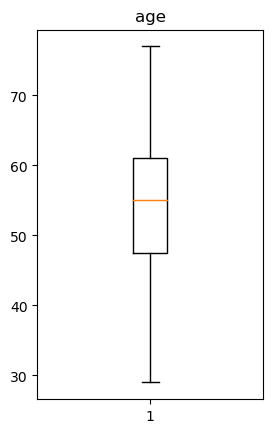

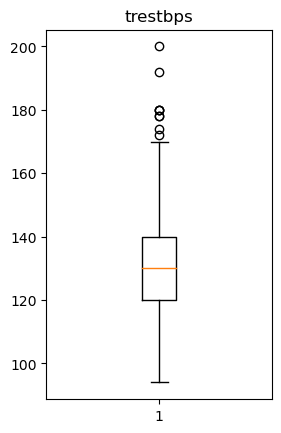

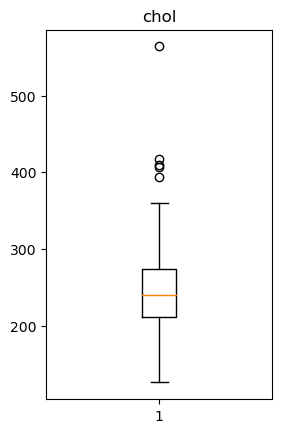

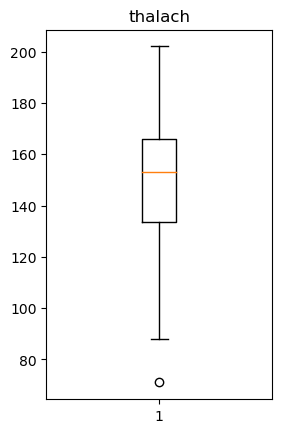

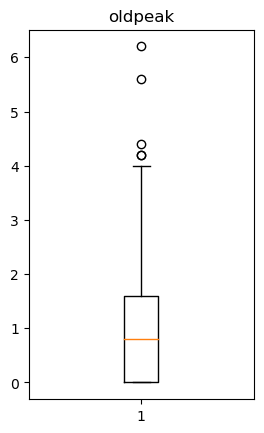

In [25]:
cols = ['age','trestbps','chol','thalach','oldpeak'] 

for i in range(len(cols)):
    plt.figure()
    plt.subplot(1,2,1)
    plt.boxplot(df[cols[i]])
    plt.title(cols[i])
    
    
    

In [26]:
#Removal of Outliers
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])





outliers(df[continous_features], drop=True)

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5
Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [27]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [28]:
#convert to dummy variables
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])





In [29]:
#Standard Scaling
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

print(dataset.head(3))

        age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.984857  0.983507 -0.203189 -0.001865  1.319305       1      0      1   
1 -1.858061  0.005738  0.177337  1.631492  2.490799       1      0      1   
2 -1.420689  0.005738 -0.852322  0.969320  0.440685       1      1      0   

   cp_0  cp_1  ...  slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_1  \
0     0     0  ...        1        0        0     1     0     0     0       1   
1     0     0  ...        1        0        0     1     0     0     0       0   
2     0     1  ...        0        0        1     1     0     0     0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  

[3 rows x 29 columns]


In [30]:
# X = dataset.drop("target", axis =1)
# y = dataset["target"]


# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33,random_state=0 )

X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [31]:
# #Naive Bayes
# nb = GaussianNB()

# y_train=y_train.astype('int')

# nb.fit(X_train,y_train)

# #print(len(y_test))

# y_train_pred=nb.predict(X_train)
# print("Training Accuracy",accuracy_score(y_train,y_train_pred))
# Y_pred_nb = nb.predict(X_test)
# print("Testing Accuracy",accuracy_score(y_test,Y_pred_nb))

In [32]:
class GaussianNB:

    def __init__(self):
        pass

    def separate_classes(self, X, y):
        separated_classes = {}
        for i in range(len(X)):
            feature_values = X[i]
            class_name = y[i]
            if class_name not in separated_classes:
                separated_classes[class_name] = []
            separated_classes[class_name].append(feature_values)
        return separated_classes
    
    def summarize(self, X):
        for feature in zip(*X):
            yield {
                'stdev' : np.std(feature),
                'mean' : np.mean(feature)
            }
          
    def fit(self, X, y):
        separated_classes = self.separate_classes(X, y)
        self.class_summary = {}
        for class_name, feature_values in separated_classes.items():
            self.class_summary[class_name] = {
                'prior_proba': len(feature_values)/len(X),
                'summary': [i for i in self.summarize(feature_values)],
            }     
        return self.class_summary
    
    def gauss_distribution_function(self, x, mean, stdev):
        exponent = np.exp(-((x-mean)**2 / (2*stdev**2)))
        return exponent / (np.sqrt(2*np.pi)*stdev)
    
    def predict(self, X):
        MAPs = []
        for row in X:
            joint_proba = {}
            for class_name, features in self.class_summary.items():
                total_features = len(features['summary'])
                likelihood = 1
                for idx in range(total_features):
                    feature = row[idx]
                    mean = features['summary'][idx]['mean']
                    stdev = features['summary'][idx]['stdev']
                    normal_proba = self.gauss_distribution_function(feature, mean, stdev)
                    likelihood *= normal_proba
                prior_proba = features['prior_proba']
                joint_proba[class_name] = prior_proba * likelihood
            MAP = max(joint_proba, key=joint_proba.get)
            MAPs.append(MAP)
        return MAPs
    
    def accuracy(self, y_test, y_pred):
        true_true = 0
        for y_t, y_p in zip(y_test, y_pred):
            if y_t == y_p:
                true_true += 1
        return true_true / len(y_test)

In [33]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_train_pred=nb.predict(X_train)
print("Training Accuracy",accuracy_score(y_train,y_train_pred))

Training Accuracy 0.8458149779735683


In [34]:
y_pred_nb = nb.predict(X_test)
score_nb=accuracy_score(y_test,y_pred_nb)
print("Testing Accuracy",accuracy_score(y_test,y_pred_nb))

Testing Accuracy 0.8245614035087719


In [35]:
#DECISIONTREE
import numpy as np
from collections import Counter
def entropy(y):
    #calculating no.of occurences of all class labels
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])
class Node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None
class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        #stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
#         print(feat_idxs)
        #greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        #grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        #parent loss
        parent_entropy = entropy(y)

        #generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        #compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        #information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common



In [36]:

dt = DecisionTree()
dt.fit(X_train, y_train)

In [37]:
y_preddtr =dt.predict(X_train)
acc1 = accuracy_score(y_train, y_preddtr)
print("Training Accuracy: ", acc1)


Training Accuracy:  1.0


In [38]:
y_pred_dt = dt.predict(X_test) 
score_dt = accuracy_score(y_test, y_pred_dt)
print("Testing Accuracy: ", score_dt)


Testing Accuracy:  0.8070175438596491


In [39]:
#RANDOMFOREST
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common
class RandomForest:
    
    def __init__(self, n_trees=10, min_samples_split=3,
                 max_depth=10, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth, n_feats=self.n_feats)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [40]:

rf = RandomForest(n_trees = 10)
rf.fit(X_train, y_train)

In [41]:
y_predr = rf.predict(X_train) 
acc1 = accuracy_score(y_train, y_predr)
print("Training Accuracy: ", acc1)

Training Accuracy:  0.986784140969163


In [42]:
y_pred_rf = rf.predict(X_test)
score_rf = accuracy_score(y_test, y_pred_rf)
print("Testing Acuracy: ", score_rf)

Testing Acuracy:  0.8245614035087719


In [43]:
#KNN
from collections import Counter

import numpy as np


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [44]:
# Imports

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

score=[]

for k in range(1,40):
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score.append(accuracy_score(y_test,predictions))
print(score)
#print("KNN classification accuracy", accuracy(y_test, predictions))

[0.6140350877192983, 0.6140350877192983, 0.6842105263157895, 0.6666666666666666, 0.7543859649122807, 0.6842105263157895, 0.7543859649122807, 0.7543859649122807, 0.7543859649122807, 0.7368421052631579, 0.7543859649122807, 0.7192982456140351, 0.7368421052631579, 0.7543859649122807, 0.7543859649122807, 0.7192982456140351, 0.7368421052631579, 0.7368421052631579, 0.7719298245614035, 0.7543859649122807, 0.7719298245614035, 0.7543859649122807, 0.7894736842105263, 0.7543859649122807, 0.7719298245614035, 0.7368421052631579, 0.7719298245614035, 0.7719298245614035, 0.7719298245614035, 0.7719298245614035, 0.7894736842105263, 0.7719298245614035, 0.7894736842105263, 0.7543859649122807, 0.8070175438596491, 0.7719298245614035, 0.7719298245614035, 0.7543859649122807, 0.7543859649122807]


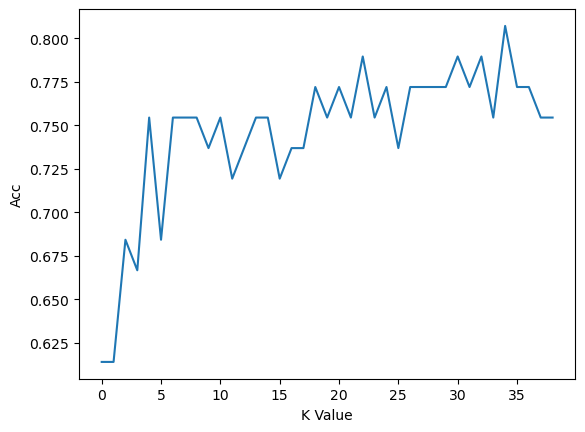

In [45]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [46]:
print(max(score))

0.8070175438596491


In [47]:
k=score.index(max(score))

In [48]:
k=35
knn=KNN(k=k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)
score_knn1=accuracy_score(y_train,y_pred_knn)
print("Training Accuracy: ",score_knn1)
y_pred_knn = knn.predict(X_test)
score_knn=accuracy_score(y_test,y_pred_knn)
print("Testing Acuracy: ",score_knn)

Training Accuracy:  0.6651982378854625
Testing Acuracy:  0.8070175438596491


In [49]:
final_data=pd.DataFrame({'Models':['NB','DT','RF','KNN'],'ACC':[accuracy_score(y_test,y_pred_nb)*100,accuracy_score(y_test,y_pred_dt)*100,accuracy_score(y_test,y_pred_rf)*100,accuracy_score(y_test,y_pred_knn)*100]})

In [50]:
final_data

,Models,ACC
0,NB,82.456140
1,DT,80.701754
2,RF,82.456140
3,KNN,80.701754


In [51]:
#Output final score
scores = [score_nb,score_dt,score_rf,score_knn]
algorithms = ["Naive Bayes","Decision Tree","Random Forest","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i]*100)+" %")

The accuracy score achieved using Naive Bayes is: 82.45614035087719 %
The accuracy score achieved using Decision Tree is: 80.7017543859649 %
The accuracy score achieved using Random Forest is: 82.45614035087719 %
The accuracy score achieved using K-Nearest Neighbors is: 80.7017543859649 %


In [52]:
new_data=pd.DataFrame({'age':52,'sex':1,'cp':0,'trestbps':125,'chol':212,'fbs':0,'restecg':1,'thalach':168,'exang':0,'oldpeak':1.0,'slope':2,'ca':2,'thal':3},index=[0])

In [53]:
new_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [54]:
p=rf.predict(new_data.values)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [55]:
new_data2=pd.DataFrame({'age':68,'sex':0,'cp':2,'trestbps':120,'chol':211,'fbs':0,'restecg':0,'thalach':115,'exang':0,'oldpeak':1.5,'slope':1,'ca':0,'thal':2},index=[0])

In [56]:
p=nb.predict(new_data2.values)
if p==0:
    print("No Disease")
else:
    print("Possibility of Heart Disease")

Possibility of Heart Disease


In [57]:
import joblib
joblib.dump(rf,'model_joblib_heart')
model=joblib.load('model_joblib_heart')
model.predict(new_data.values)

array([0], dtype=int64)

C:\Users\racha\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

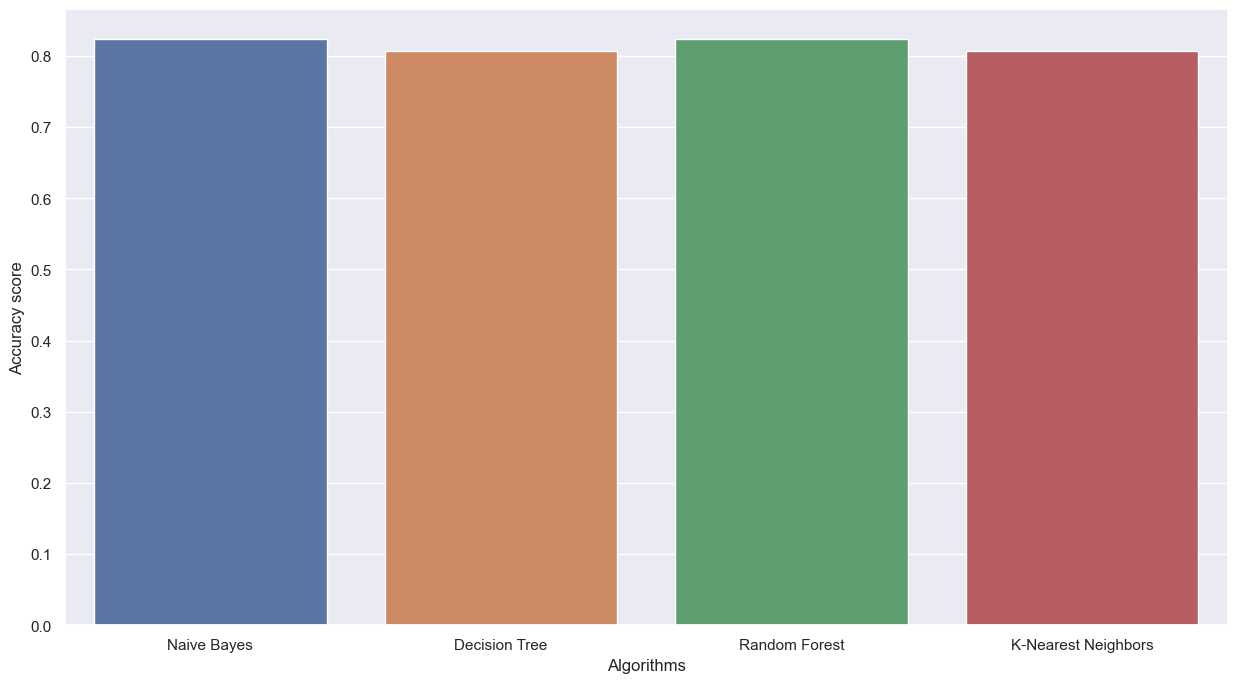

In [58]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [ ]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()